In [1]:
from itertools import combinations
from tqdm import tqdm
import numpy as np
import pickle
import lzma
import os


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [3]:
setups = os.listdir("../data/project_returns/")
setups

['concat_G_arrays',
 'concat_G_arrays_random',
 'concat_G_arrays_cpt_random',
 'concat_G_arrays_sda',
 'concat_G_arrays_cpt',
 'concat_G_arrays_cpt_sda',
 'concat_G_arrays_risk_aversion_experiment']

100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


TypeError: 'AxesSubplot' object is not subscriptable

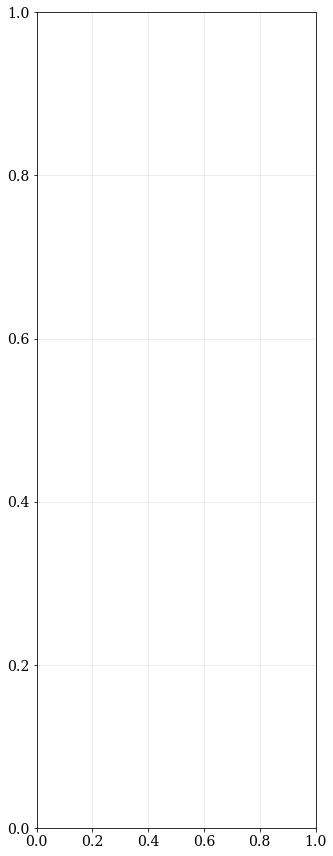

In [22]:
colors = ["orange", "green", "purple", "red", "dodgerblue", "pink", "yellow"]
titles = ["MPT / HK", "MPT / R", "CPT / R", "MPT / SDA", "CPT / HK", "CPT / SDA", "MPT / HK + Low RA"]

setups = ['concat_G_arrays_sda']

fig, axs = plt.subplots(len(setups),1, figsize=(5,15))

for s_idx, s in enumerate(setups):

    summed_project_returns = []
    for f in tqdm(os.listdir("../data/project_returns/" + s)):
        data = pickle.load(lzma.open(f"../data/project_returns/" + s + f"/{f}"))
        if "sda" in s:
            summed_project_returns.append([np.mean(x) for x in data])
        else:    
            sum1 = np.sum(data, axis=2).astype(np.float32)
            sum2 = np.sum(sum1, axis=0)
            summed_project_returns.append(sum2)

    concat = np.stack(summed_project_returns)
    concat_summed = np.sum(concat, axis=0)[:-1]
    if "cpt" in s:
        total = 8192*50*10
    else:
        total = 9216*50*10

    concat_mean = concat_summed / total
    axs[s_idx].hist(list(concat_mean), color=colors[s_idx], edgecolor="k", bins=20, alpha=0.8)
    axs[s_idx].set_title(titles[s_idx])
    axs[s_idx].set_xlim(0, 0.7)

fig.tight_layout()
plt.show()

In [27]:
np.stack(summed_project_returns).shape

(10, 9216)

In [31]:
np.sum(np.stack(summed_project_returns), axis=0)

array([ 7.848,  2.033,  8.445, ..., 11.77 , 12.02 ,  5.543], dtype=float16)